# Intercompare Lifetime Distributions

## Libs Sections 

In [2]:
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_context('talk')
import cartopy.crs as ccrs
import cartopy.feature as cf


import glob

import tobac
import sys
import json




## Input Data 

In [17]:
main_dir = "/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/*/statistics"

flist = sorted( glob.glob(f'{main_dir}/global_lifetime_precip_tracks_thresh*_202006.nc') )
flist

['/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/statistics/global_lifetime_precip_tracks_thresh100_202006.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224b/statistics/global_lifetime_precip_tracks_thresh200_202006.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224c/statistics/global_lifetime_precip_tracks_thresh100_202006.nc',
 '/work/bb1376/user/fabian/data/oxford-hackathon/icon-hamlite/r2b9_lite_1224c/statistics/global_lifetime_precip_tracks_thresh200_202006.nc']

In [18]:
dlist = []
for f in flist:
    experiment =  f.split('/')[-3]
    fname = f.split('/')[-1]

    d = xr.open_dataset( f )

    d = d.expand_dims('experiment')
    d['experiment'] = [experiment,]
    
    d = d.expand_dims('fname')
    d['fname'] = [fname]

    dlist += [d,]
    

In [19]:
d = xr.merge(dlist)

In [20]:
diff = d.diff('experiment')
diff['experiment'] = ['difference']

#d = xr.concat([d, diff], dim = 'experiment')

## Name Bugfix

In [32]:
if 'PDF_CSD' in d:
    d = d.rename_vars({'PDF_CSD': 'PDF_Lifetime'})

### Reorder

In [33]:
flist = xr.concat([d.fname[-1],d.fname[:-1]], dim = 'fname')
flist

<xarray.DataArray 'fname' (fname: 2)> Size: 392B
array(['global_lifetime_precip_tracks_thresh200_202006.nc',
       'global_lifetime_precip_tracks_thresh100_202006.nc'], dtype='<U49')
Coordinates:
  * fname    (fname) <U49 392B 'global_lifetime_precip_tracks_thresh200_20200...

In [34]:
d = d.sel(fname = flist)

## Plotting

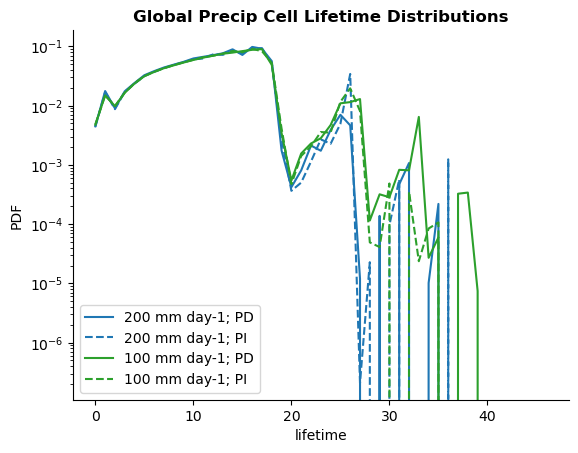

In [37]:
colors = ['C0','C2','C1','C3']
styles = ['-','--']
labs = ['PD', 'PI']

for i in range(len(flist)):
    fname = flist[i]
    thresh = str(fname.data).split('_')[4].replace('thresh','')
    
    v = d['PDF_Lifetime'].mean('day').sel(fname = fname)

    for k, expname in enumerate(v.experiment):
        label = f'{thresh} mm day-1; {labs[k]}' 
        v.sel(experiment = expname).plot(color = colors[i], linestyle = styles[k], label = label)

sns.despine()
plt.ylabel('PDF')
plt.yscale('log')
    
plt.title(f'Global Precip Cell Lifetime Distributions', fontweight = 'bold') 
plt.legend()